In [3]:
import pandas as pd

csv_path = "../data/uk_housing_rentals.csv"

df = pd.read_csv(csv_path)
df.head()


,Unnamed: 0,Description,Location,Number of Rooms,Price
0,0,1 Bedroom Flat For Rent,"Birmingham, West Midla...",1 bedroom,£ 625 ...
1,1,1 Bedroom Flat For Rent,"Birmingham, West Midla...",1 bedroom,£ 625 ...
2,2,"4B Paddington Basin, London, W2","London, Greater London...",3 bedrooms,"£ 6,000 ..."
3,3,2 Bedroom Terraced House to Rent in Albert Roa...,"London, Greater London...",2 bedrooms,"£ 1,400 ..."
4,4,2 Bedroom Terraced House to Rent in Albert Roa...,"London, Greater London...",2 bedrooms,"£ 1,400 ..."


In [4]:
print("The shape of the dataset is: ", df.shape)

The shape of the dataset is:  (39039, 5)


In [9]:
print("Basic info about the dataset: ")
df.info()
df.describe()

Basic info about the dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39039 entries, 0 to 39038
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       39039 non-null  int64 
 1   Description      39039 non-null  object
 2   Location         39039 non-null  object
 3   Number of Rooms  39039 non-null  object
 4   Price            39039 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.5+ MB


,Unnamed: 0
count,39039.000000
mean,14056.481826
std,10376.635315
min,0.000000
25%,3654.500000
50%,13414.000000
75%,23173.500000
max,32933.000000


In [11]:
print("Unique values in 'Number of Rooms' (first 20):")
print(df["Number of Rooms"].unique()[:20])


Unique values in 'Number of Rooms' (first 20):
['1 bedroom' '3 bedrooms' '2 bedrooms' '4 bedrooms' '6 bedrooms'
 '5 bedrooms' 'Not Specified' '34 sq.foot' '10 bedrooms' '27 sq.foot'
 '24 sq.foot' '7 bedrooms']


In [12]:
print("First 10 raw Price values:")
print(df["Price"].head(10).tolist())


First 10 raw Price values:
['                            £ 625                        ', '                            £ 625                        ', '                            £ 6,000                        ', '                            £ 1,400                        ', '                            £ 1,400                        ', '                            £ 2,817                        ', '                            £ 1,525                        ', '                            £ 346                        ', '                            £ 2,058                        ', '                            £ 2,000                        ']


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39039 entries, 0 to 39038
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Description      39039 non-null  object
 1   Location         39039 non-null  object
 2   Number of Rooms  39039 non-null  object
 3   Price            39039 non-null  object
dtypes: object(4)
memory usage: 1.2+ MB


In [16]:
# Start from the raw Price column as strings
price_raw = df["Price"]

#Stripping it from the whitespaces it has
price_clean = price_raw.str.strip()

#Removing the gbp sign
price_clean = price_clean.str.replace("£", "", regex=False)

#Remove the commas as well
price_clean = price_clean.str.replace(",", "", regex=False)

#Finishing the clean prices by removing any internal whitespaces left 
price_clean = price_clean.str.strip()

#Converting it to numeric 
df["Price_numeric"] = pd.to_numeric(price_clean, errors="coerce")

df[["Price", "Price_numeric"]].head(10)

,Price,Price_numeric
0,£ 625 ...,625
1,£ 625 ...,625
2,"£ 6,000 ...",6000
3,"£ 1,400 ...",1400
4,"£ 1,400 ...",1400
5,"£ 2,817 ...",2817
6,"£ 1,525 ...",1525
7,£ 346 ...,346
8,"£ 2,058 ...",2058
9,"£ 2,000 ...",2000


In [17]:
print("Price_numeric summary:")
print(df["Price_numeric"].describe())


Price_numeric summary:
count    39039.000000
mean      2569.694818
std       2202.615818
min        270.000000
25%       1400.000000
50%       2058.000000
75%       3250.000000
max      41167.000000
Name: Price_numeric, dtype: float64


In [18]:
import numpy as np

rooms_raw = df["Number of Rooms"].astype(str).str.strip().str.lower()

# Start with all values as NaN
df["Rooms_numeric"] = np.nan

# Mask for entries that contain 'bedroom' or 'bedrooms'
mask_bedroom = rooms_raw.str.contains("bedroom")

# For those rows, take the first token (before the space) and convert to number
rooms_numbers = rooms_raw[mask_bedroom].str.split().str[0]

df.loc[mask_bedroom, "Rooms_numeric"] = pd.to_numeric(rooms_numbers, errors="coerce")

df[["Number of Rooms", "Rooms_numeric"]].head(20)


,Number of Rooms,Rooms_numeric
0,1 bedroom,1.0
1,1 bedroom,1.0
2,3 bedrooms,3.0
3,2 bedrooms,2.0
4,2 bedrooms,2.0
5,1 bedroom,1.0
6,2 bedrooms,2.0
7,3 bedrooms,3.0
8,2 bedrooms,2.0
9,1 bedroom,1.0


In [19]:
print("Rooms_numeric summary:")
print(df["Rooms_numeric"].describe())
print("\nNumber of missing values in Rooms_numeric:", df["Rooms_numeric"].isna().sum())


Rooms_numeric summary:
count    38952.000000
mean         2.026956
std          1.104995
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         10.000000
Name: Rooms_numeric, dtype: float64

Number of missing values in Rooms_numeric: 87


In [20]:
df.columns


Index(['Description', 'Location', 'Number of Rooms', 'Price', 'Price_numeric',
       'Rooms_numeric'],
      dtype='object')

In [23]:
#Keeping the columns we actually need
df_model = df[["Rooms_numeric", "Price_numeric"]].copy()

#Drop the nan rows
df_model = df_model.dropna(subset=["Rooms_numeric", "Price_numeric"])

print("Shape of df_model: ", df_model.shape)
df_model.head()

Shape of df_model:  (38952, 2)


,Rooms_numeric,Price_numeric
0,1.0,625
1,1.0,625
2,3.0,6000
3,2.0,1400
4,2.0,1400


In [24]:
print("Info for df_model:")
df_model.info()

print("\nSummary statistics for df_model:")
print(df_model.describe())


Info for df_model:
<class 'pandas.core.frame.DataFrame'>
Index: 38952 entries, 0 to 39038
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms_numeric  38952 non-null  float64
 1   Price_numeric  38952 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 912.9 KB

Summary statistics for df_model:
       Rooms_numeric  Price_numeric
count   38952.000000   38952.000000
mean        2.026956    2565.736239
std         1.104995    2177.887264
min         1.000000     270.000000
25%         1.000000    1400.000000
50%         2.000000    2058.000000
75%         2.000000    3250.000000
max        10.000000   38889.000000


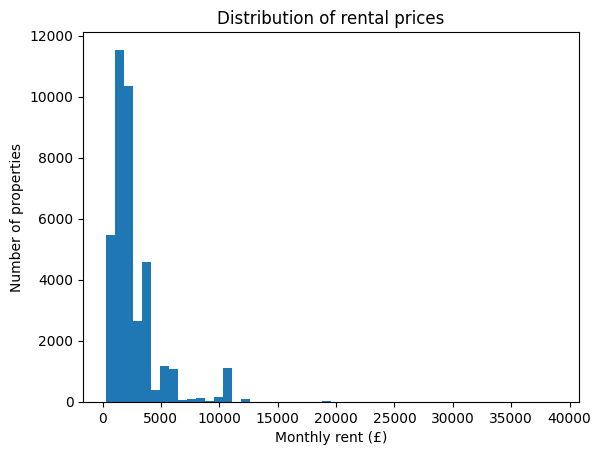

In [25]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df_model["Price_numeric"], bins=50)
plt.xlabel("Monthly rent (£)")
plt.ylabel("Number of properties")
plt.title("Distribution of rental prices")
plt.show()


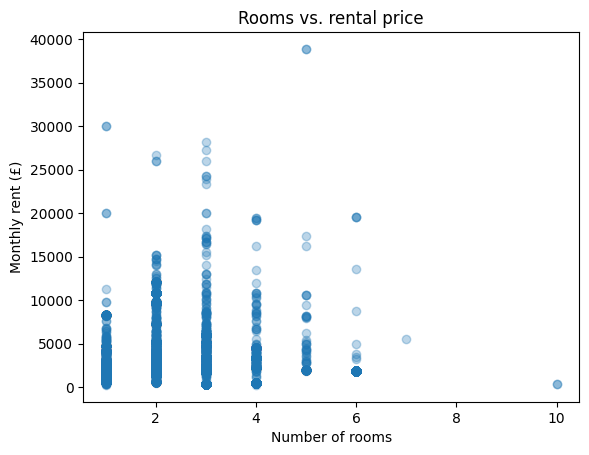

In [26]:
plt.figure()
plt.scatter(df_model["Rooms_numeric"], df_model["Price_numeric"], alpha=0.3)
plt.xlabel("Number of rooms")
plt.ylabel("Monthly rent (£)")
plt.title("Rooms vs. rental price")
plt.show()
